In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#Load Sample Dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We take only the first two features for visualization
y = iris.target


In [3]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [4]:
#Train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [5]:
#Make predictions
y_pred = svm.predict(X_test)

Text(0.5, 1.0, 'SVM Predictions on Test Set')

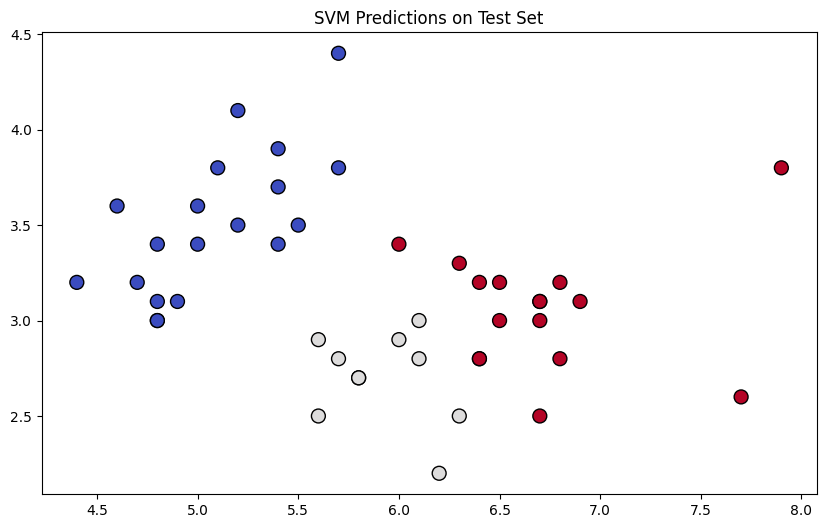

In [6]:
#Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
plt.title('SVM Predictions on Test Set')    

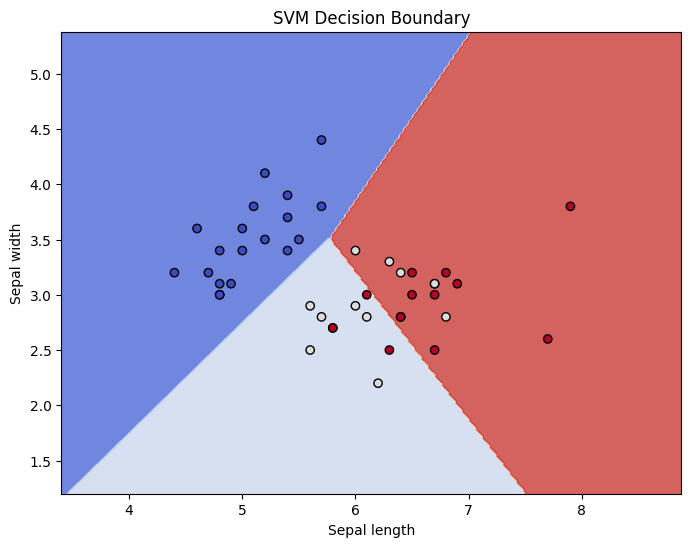

In [7]:
#Visualize the results
def plot_decision_boundary(clf, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(svm, X_test, y_test)

In [8]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))   

Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



In [9]:
# Example: Predict for a new observation
new_data = np.array([[5.1, 3.5]])  # Example input shape (n_samples, n_features)
prediction = svm.predict(new_data)
print("Predicted class:", prediction)


Predicted class: [0]


In [10]:
#Hyperparameter Tuning Example
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)


Best parameters: {'C': 0.1, 'kernel': 'linear'}


In [11]:
# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = SVC(kernel=kernel, gamma='scale', degree=3, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\nKernel: {kernel}")
    print(classification_report(y_test, y_pred))


Kernel: linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45


Kernel: poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45


Kernel: rbf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.7

c:\Users\srira\AI\Analytics\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\srira\AI\Analytics\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\srira\AI\Analytics\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
